# **Value at Risk (VaR) Analysis**

## **0. Introduccion Teorica**


El "Value at Risk" (VaR) es una medida utilizada en finanzas para estimar el riesgo de mercado de una cartera de inversiones. El VaR representa la pérdida máxima esperada, con un nivel de confianza específico, en una posición o cartera durante un período de tiempo determinado. Se expresa en términos de un valor monetario.

VaR=P×σ×Z



- P es el valor de la cartera o posición.


- σ es la volatilidad de la cartera o posición.

- Z es el valor crítico de la distribución normal estándar asociado al nivel de confianza deseado.

El VaR es una herramienta útil para medir y gestionar el riesgo en carteras de inversión. Sin embargo, es importante reconocer sus limitaciones, como la asunción de una distribución normal de rendimientos y la falta de información sobre las pérdidas extremas más allá del VaR especificado. Por esta razón, se suelen combinar el VaR con otras medidas de riesgo y pruebas de tensión para obtener una visión más completa del riesgo.

## **1. Importar librerias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

## **2. Time Range - Tickers**

### **Time Range**

In [2]:
years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

### **Tickers**

In [3]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2008-12-22   65.418678  50.698933   83.459999   25.588755   32.775032
2008-12-23   64.742409  50.886841   82.629997   25.457342   32.425716
2008-12-24   65.118134  50.843895   83.459999   25.527430   32.554817
2008-12-26   65.493866  50.882919   85.599998   25.518663   32.896530
2008-12-29   65.305969  51.201664   86.349998   25.308424   32.645927
...                ...        ...         ...         ...         ...
2023-12-12  462.225952  72.040001  183.490005  398.670013  230.660004
2023-12-13  468.600098  7

## **3. Daily Log Returns**
Los rendimientos logarítmicos diarios son una medida comúnmente utilizada en finanzas para evaluar la variación porcentual en el precio de un activo de un día a otro. Estos rendimientos se calculan tomando el logaritmo natural de la razón entre el precio de un día y el precio del día anterior.

In [4]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()
print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2008-12-23 -0.010391  0.003700 -0.009995 -0.005149 -0.010715
2008-12-24  0.005787 -0.000844  0.009995  0.002749  0.003974
2008-12-26  0.005753  0.000767  0.025318 -0.000343  0.010442
2008-12-29 -0.002873  0.006245  0.008724 -0.008273 -0.007647
2008-12-30  0.023426  0.001904 -0.005225  0.020556  0.025946
...              ...       ...       ...       ...       ...
2023-12-12  0.004557  0.002919 -0.000545  0.007933  0.003779
2023-12-13  0.013696  0.012690  0.022312  0.012637  0.015401
2023-12-14  0.003204  0.007510  0.005845 -0.000867  0.005917
2023-12-15 -0.001648 -0.001498 -0.009209  0.004822 -0.001359
2023-12-18  0.003934 -0.002319  0.002884  0.000358  0.002759

[3772 rows x 5 columns]


## **4. Portfolio Allocation**
La "Asignación de Portafolio" se refiere a la distribución de activos dentro de una cartera de inversiones con el objetivo de alcanzar ciertos objetivos financieros.

##**Clases de Activos:**

Diferentes categorías de instrumentos financieros, como acciones, bonos, efectivo y bienes raíces, cada una con características de riesgo y rendimiento distintas.

###**Diversificación:**

Estrategia de distribuir los fondos entre varias clases de activos para reducir el riesgo total de la cartera, ya que diferentes activos pueden comportarse de manera diferente en diferentes condiciones de mercado.

###**Horizonte Temporal y Objetivos Financieros:**

La duración de la inversión y los objetivos financieros del inversor, que influyen en la selección de activos y la estrategia de asignación de portafolio.

###**Tolerancia al Riesgo:**

La disposición del inversor a aceptar riesgos financieros, que determina la proporción de activos más volátiles, como las acciones, en la cartera.

###**Reequilibrio:**

El proceso periódico de ajustar la asignación de activos para mantenerse en línea con los objetivos de inversión y adaptarse a cambios en las condiciones del mercado.

###**Análisis de Rendimiento y Riesgo:**

Evaluación de cómo diferentes asignaciones de portafolio pueden impactar la rentabilidad y la volatilidad de la cartera.

###**Optimización de Carteras:**

El uso de técnicas matemáticas y estadísticas para encontrar la combinación óptima de activos que maximiza el rendimiento esperado dadas restricciones de riesgo.

###**Modelos de Factor:**

Consideración de factores como tamaño de empresa, valor, momentum, entre otros, en la asignación de portafolio.


In [5]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


## **5. Portfolio Analytics**

### **Historical Portfolio Returns**

In [6]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2008-12-23   -0.006510
2008-12-24    0.004332
2008-12-26    0.008387
2008-12-29   -0.000765
2008-12-30    0.013321
                ...   
2023-12-12    0.003729
2023-12-13    0.015347
2023-12-14    0.004322
2023-12-15   -0.001778
2023-12-18    0.001523
Length: 3772, dtype: float64


###**50-Day Historical Returns**

In [7]:
days = 50

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2009-03-06   -0.097735
2009-03-09   -0.104812
2009-03-10   -0.078435
2009-03-11   -0.078894
2009-03-12   -0.051204
                ...   
2023-12-12    0.078120
2023-12-13    0.104835
2023-12-14    0.102278
2023-12-15    0.101492
2023-12-18    0.094715
Length: 3723, dtype: float64


### **VaR Analysis**

El Valor en Riesgo (VaR) es una medida que cuantifica la pérdida máxima esperada en una cartera o activo en un período de tiempo específico, con un nivel de confianza determinado.

El Método Histórico es una forma sencilla de calcular el VaR utilizando datos históricos de rendimientos. Este metodo no tiene en cuenta eventos extremos no observados en el período histórico analizado.

Supongamos que se tiene un nivel de confianza del 95% y se obtiene un VaR del 5%. Esto significa que se espera que la pérdida máxima en la cartera sea igual o menor al rendimiento que se encuentra en el percentil 5 de los rendimientos históricos.



In [10]:
confidence_interval = 0.95

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

55767.13883110146


## **6. Visualizacion de datos**

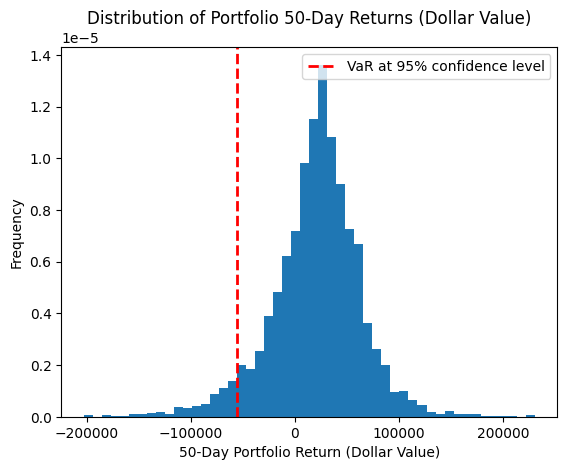

In [11]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()